In [43]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from keras.models import load_model

In [9]:
start ='2021-01-01'
end='2023-12-31'
stock = "GOOG"
data =  yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [10]:
data.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,142.130005,143.250000,142.054993,142.720001,142.370361,18494700
2023-12-26,142.979996,143.945007,142.500000,142.820007,142.470123,11170100
2023-12-27,142.830002,143.320007,141.050995,141.440002,141.093506,17288400
2023-12-28,141.850006,142.270004,140.828003,141.279999,140.933899,12192500
2023-12-29,140.679993,141.434998,139.899994,140.929993,140.584747,14872700


In [11]:
data.reset_index(inplace=True)

In [29]:
data # data is per day wise ,open = at the begining of day price,high = full days highest ,low = full days lowest,close=price of the stock at the end of the day,Volume: The total number of shares or contracts traded during the trading day

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,87.876999,88.032501,85.392502,86.412003,86.200310,38038000
1,2021-01-05,86.250000,87.383499,85.900749,87.045998,86.832756,22906000
2,2021-01-06,85.131500,87.400002,84.949997,86.764503,86.551941,52042000
3,2021-01-07,87.002998,89.419998,86.852501,89.362503,89.143578,45300000
4,2021-01-08,89.399002,90.491997,88.676750,90.360497,90.139130,41012000
...,...,...,...,...,...,...,...
748,2023-12-22,142.130005,143.250000,142.054993,142.720001,142.370361,18494700
749,2023-12-26,142.979996,143.945007,142.500000,142.820007,142.470123,11170100
750,2023-12-27,142.830002,143.320007,141.050995,141.440002,141.093506,17288400
751,2023-12-28,141.850006,142.270004,140.828003,141.279999,140.933899,12192500


In [15]:
h_day=data.Close.rolling(100).mean()

In [16]:
h_day

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
748    134.4154
749    134.5559
750    134.6849
751    134.7783
752    134.8692
Name: Close, Length: 753, dtype: float64

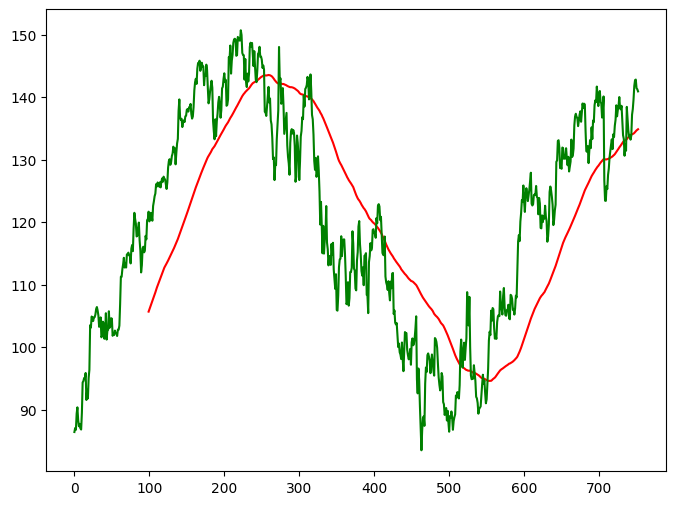

In [20]:
plt.figure(figsize=(8,6))
plt.plot(h_day,'r')
plt.plot(data.Close,'g')
plt.show()

In [21]:
t_day=data.Close.rolling(200).mean()

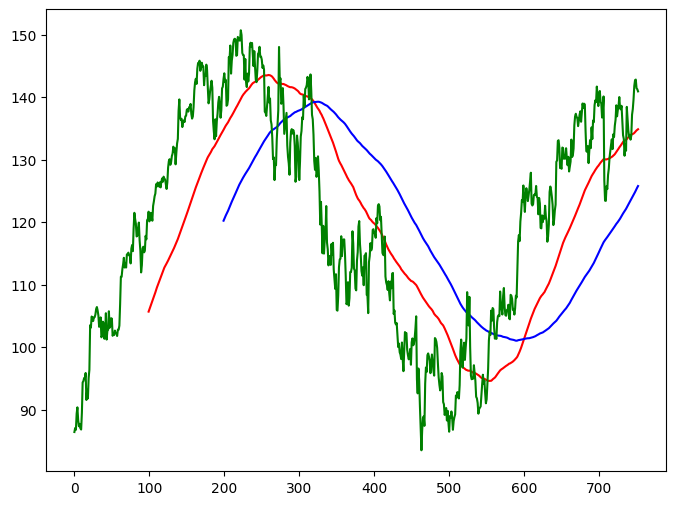

In [22]:
plt.figure(figsize=(8,6))
plt.plot(h_day,'r')
plt.plot(t_day,'b')
plt.plot(data.Close,'g')
plt.show()


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       753 non-null    datetime64[ns]
 1   Open       753 non-null    float64       
 2   High       753 non-null    float64       
 3   Low        753 non-null    float64       
 4   Close      753 non-null    float64       
 5   Adj Close  753 non-null    float64       
 6   Volume     753 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 41.3 KB


In [24]:
data.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,87.876999,88.032501,85.392502,86.412003,86.200310,38038000
1,2021-01-05,86.250000,87.383499,85.900749,87.045998,86.832756,22906000
2,2021-01-06,85.131500,87.400002,84.949997,86.764503,86.551941,52042000
3,2021-01-07,87.002998,89.419998,86.852501,89.362503,89.143578,45300000
4,2021-01-08,89.399002,90.491997,88.676750,90.360497,90.139130,41012000
...,...,...,...,...,...,...,...
748,2023-12-22,142.130005,143.250000,142.054993,142.720001,142.370361,18494700
749,2023-12-26,142.979996,143.945007,142.500000,142.820007,142.470123,11170100
750,2023-12-27,142.830002,143.320007,141.050995,141.440002,141.093506,17288400
751,2023-12-28,141.850006,142.270004,140.828003,141.279999,140.933899,12192500


In [33]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [35]:
pas_100_days = data_train.tail(100)
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)
data_test_scale = scaler.fit_transform(data_test)

2024-10-15 20:10:56.414 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-15 20:10:56.924 
  command:

    streamlit run C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-10-15 20:10:56.924 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


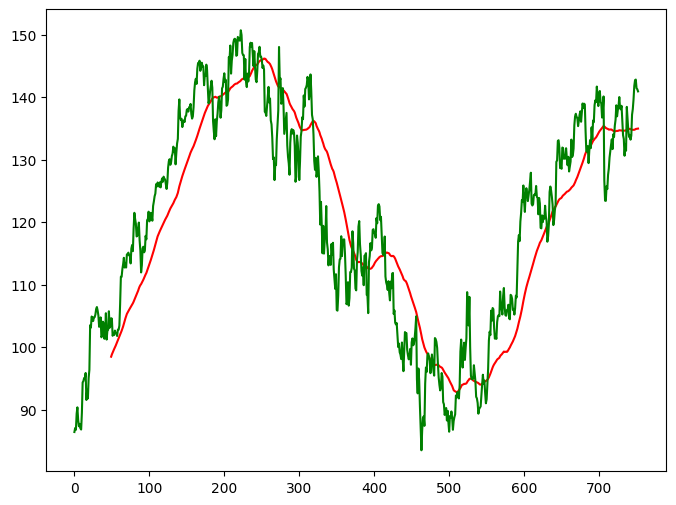

2024-10-15 20:10:57.152 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-15 20:10:57.364 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-15 20:10:57.364 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [37]:
import streamlit as st
st.subheader('Price vs MA50')
ma_50_days = data.Close.rolling(50).mean()
fig1 = plt.figure(figsize=(8,6))
plt.plot(ma_50_days, 'r')
plt.plot(data.Close, 'g')
plt.show()
st.pyplot(fig1)

2024-10-15 20:11:33.335 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-15 20:11:33.335 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


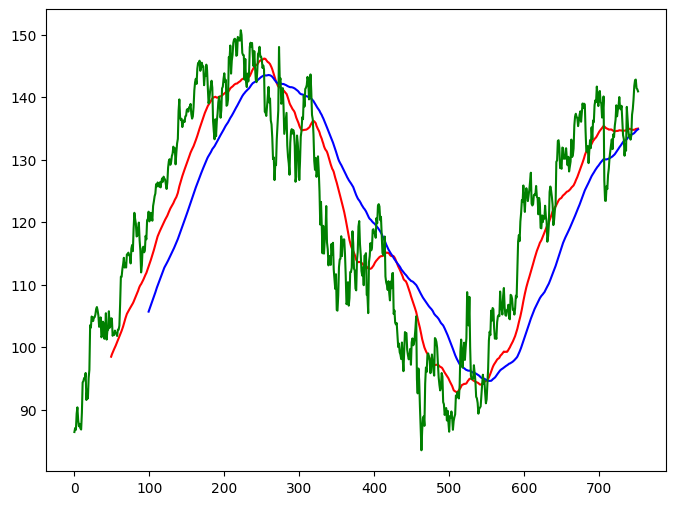

2024-10-15 20:11:33.478 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-15 20:11:33.684 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-15 20:11:33.694 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [38]:
st.subheader('Price vs MA50 vs MA100')
ma_100_days = data.Close.rolling(100).mean()
fig2 = plt.figure(figsize=(8,6))
plt.plot(ma_50_days, 'r')
plt.plot(ma_100_days, 'b')
plt.plot(data.Close, 'g')
plt.show()
st.pyplot(fig2)

2024-10-15 20:11:53.406 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-15 20:11:53.406 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


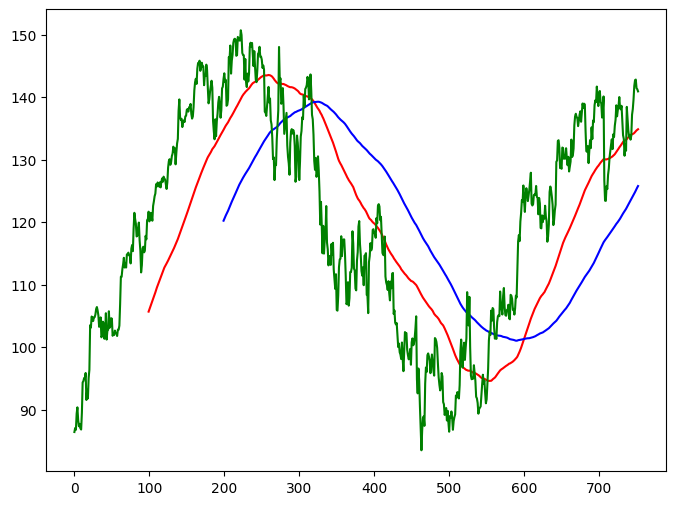

2024-10-15 20:11:53.535 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-15 20:11:53.704 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-15 20:11:53.704 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [39]:
st.subheader('Price vs MA100 vs MA200')
ma_200_days = data.Close.rolling(200).mean()
fig3 = plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()
st.pyplot(fig3)


In [62]:

import pandas as pd
import yfinance as yf
from keras.models import load_model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

# Load the model (if needed)
# model = load_model(r'C:\Python\Stock\Stock Predictions Model.keras')

# Set stock and date range
start = '2021-01-01'
end = '2023-12-31'
stock = "GOOG"
data = yf.download(stock, start, end)

# Split data into training and testing sets
data_train = pd.DataFrame(data['Close'][0: int(len(data) * 0.80)])
data_test = pd.DataFrame(data['Close'][int(len(data) * 0.80): len(data)])

# Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
pas_100_days = data_train.tail(100)  # Last 100 days of training data
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)  # Concatenate for scaling
data_test_scale = scaler.fit_transform(data_test)

# Preparing the data for LSTM
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i, 0])

x, y = np.array(x), np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))  # Reshape for LSTM input

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))  # Output layer

# Compile the model (make sure to compile it before fitting)
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model (You would need to define a training set, not shown in your code)
# model.fit(x_train, y_train, epochs=50, batch_size=32)  # Uncomment and define x_train, y_train

# After fitting the model, you can make predictions with predict = model.predict(x)


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))
# At this point, `predict` will contain your predicted values and `y` your actual values, both rescaled.


[*********************100%***********************]  1 of 1 completed
c:\Users\DELL\New folder (2)\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Input 0 of layer "lstm_10" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 1)

In [48]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [49]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 163ms/step - loss: 2067.3416
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - loss: 2020.7743
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - loss: 75657224192.0000
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 1884.8627
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 1996.7437
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 1942.0446
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - loss: 1983.5443
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 2028.4930
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 1998.7963
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - loss: 2028.1885
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 2029.0652
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - loss: 3044.7568
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - loss: 1954.8684
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - loss: 1980.0795
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━

In [50]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [51]:
pas_100_days = data_train.tail(100)

In [52]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [53]:
data_test_scale  =  scaler.fit_transform(data_test)

In [54]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [56]:
y_predict = model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [57]:
scale =1/scaler.scale_

In [58]:
y_predict = y_predict*scale

In [59]:
y = y*scale

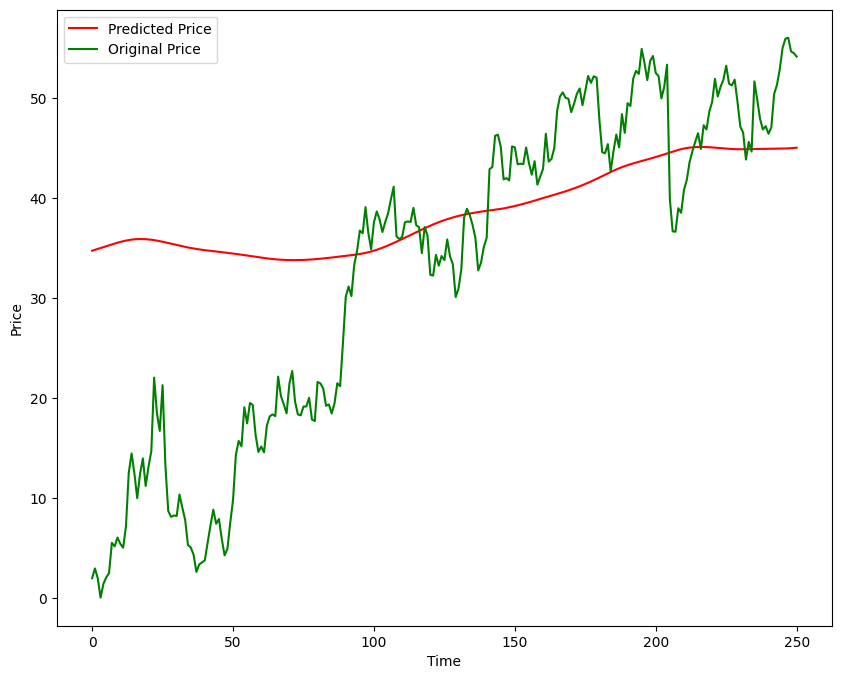

In [60]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [61]:
model.save('Stock Predictions Model.keras')

[*********************100%***********************]  1 of 1 completed
c:\Users\DELL\New folder (2)\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 0.2975
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0991
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.0462
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.0355
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.0275
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0258
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0210
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0187
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - loss: 0.0214
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 0.0193
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - loss: 0.0203
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.0166
Epoch 13/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.0168
Epoch 14/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - loss: 0.0172
Epoch 15/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss

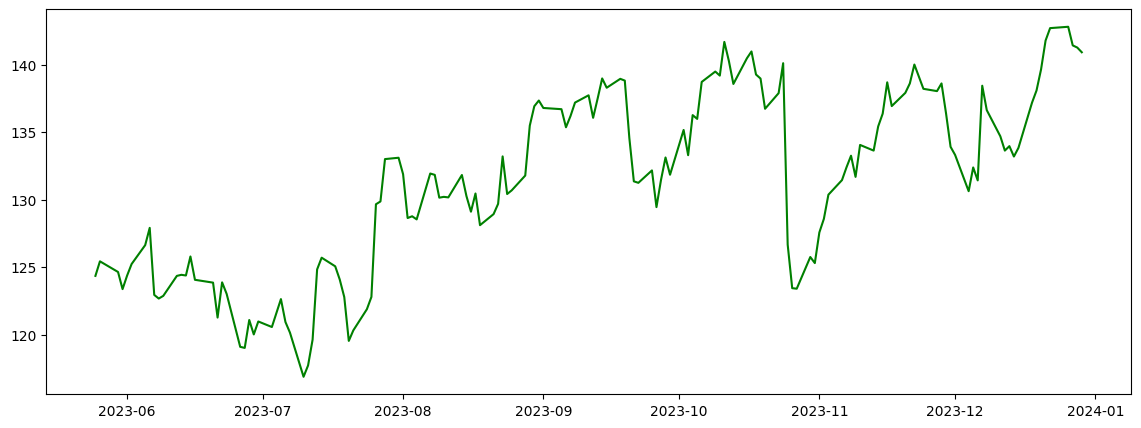

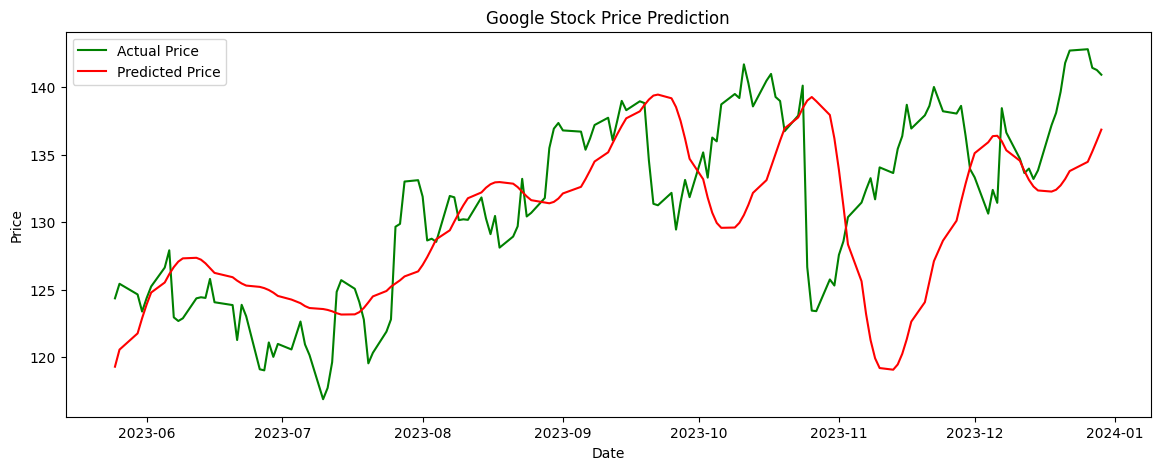

In [64]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load and prepare the data
start = '2021-01-01'
end = '2023-12-31'
stock = "GOOG"

# Download stock data
data = yf.download(stock, start=start, end=end)

# Use only the 'Close' price for prediction
data = data[['Close']]

# Step 2: Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Step 3: Prepare the training and testing dataset
train_size = int(len(scaled_data) * 0.80)  # 80% for training
train_data = scaled_data[0:train_size]
test_data = scaled_data[train_size - 100:]  # last 100 days of training data for testing

# Prepare the training dataset
x_train, y_train = [], []
for i in range(100, len(train_data)):
    x_train.append(train_data[i-100:i, 0])  # last 100 days
    y_train.append(train_data[i, 0])        # next day price

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))  # Reshape for LSTM

# Step 4: Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Fit the model
model.fit(x_train, y_train, epochs=50, batch_size=32)

# Step 6: Prepare the test dataset
x_test, y_test = [], data['Close'][train_size:].values
for i in range(100, len(test_data)):
    x_test.append(test_data[i-100:i, 0])

x_test = np.array(x_test)
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Step 7: Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # Inverse transform to get actual prices

# Step 8: Plotting the results
plt.figure(figsize=(14, 5))
plt.plot(data.index[train_size:], y_test, color='green', label='Actual Price')
plt.plot(data.index[train_size:train_size+len(predictions)], predictions, color='red', label='Predicted Price')

plt.title('Google Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
